<a href="https://colab.research.google.com/github/Profvmarques/cienciadedados/blob/main/Tweeter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading libraries & Setup

In [ ]:
import tweepy

# TextBlob - Python library for processing textual data
from textblob import TextBlob

# WordCloud - Python linrary for creating image wordclouds
from wordcloud import WordCloud

# Pandas - Data manipulation and analysis library
import pandas as pd

# NumPy - mathematical functions on multi-dimensional arrays and matrices
import numpy as np

# Regular Expression Python module
import re

# Matplotlib - plotting library to create graphs and charts
import matplotlib.pyplot as plt

import requests
from contextlib import closing
import csv

# Settings for Matplotlib graphs and charts
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

import nltk
nltk.download('punkt')
nltk.download('corpus')
nltk.download('rslp')

stopwords = ['a', 'até', 'com','agora', 'algum', 'alguma', 'aquele', 'aqueles', 'de', 'deu', 'do', 'e', 'estou', 'esta', 'esta',
             'ir', 'meu', 'muito', 'mesmo', 'no', 'nossa', 'o', 'outro', 'para', 'que', 'sem', 'talvez', 'tem', 'tendo',
             'tenha', 'teve', 'tive', 'todo', 'um', 'uma', 'umas', 'uns', 'vou']
nltk.download("stopwords")
stopwords = nltk.corpus.stopwords.words('portuguese')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Error loading corpus: Package 'corpus' not found in index
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Vamos carregar o arquivo de configuração (certifique-se de editar o arquivo de configuração e inserir os detalhes da API do Twitter conforme descrito na introdução).

In [ ]:
#config = pd.read_csv("./config.csv")

Agora precisamos definir todas as variáveis ​​de configuração da API do Twitter necessárias para autorização com Tweepy.

In [ ]:
# Twitter API config
with open('twitter-tokens.txt', 'r') as tfile:
    twitterApiKey = tfile.readline().strip('\n')
    twitterApiSecret = tfile.readline().strip('\n')
    twitterApiAccessToken = tfile.readline().strip('\n')
    twitterApiAccessTokenSecret = tfile.readline().strip('\n')

Estamos fazendo uma chamada de autenticação com Tweepy para que possamos chamar uma função para recuperar os últimos tweets da conta especificada.

In [ ]:
# Authenticate
auth = tweepy.OAuthHandler(twitterApiKey, twitterApiSecret)
auth.set_access_token(twitterApiAccessToken, twitterApiAccessTokenSecret)
#twetterApi = tweepy.API(auth, wait_on_rate_limit = True)
api = tweepy.API(auth, wait_on_rate_limit = True)

Sinta-se à vontade para mudar a conta do Tweeter para uma conta diferente.

Agora vamos recuperar os últimos 1000 Tweets e respostas da conta do Tweeter especificada.

In [ ]:
#query_search= "#Trump"  + " -filter:retweets lang:pt-br " + "since:2016-09-01 until:2016-11-30"
#query_search= "#covid"  + " -filter:retweets lang:pt-br"
#tweets = tweepy.Cursor(api.search,q=query_search).items(100);

#search_words = "#covid or #coronavirus or #omicron or #covid-19"
arquivo="result.csv"
search_words = "#datapovo"
date_since = "2022-07-03"


#date_end ="2020-06-11"
tweets = tweepy.Cursor(api.search,
                       q=search_words,
                       lang="pt-br",
                       since=date_since).items(100000)

vamos criar o Pandas Data Frame a partir dele

Vamos ver o que está no quadro de dados chamando a função head ().

In [ ]:
df = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['TextOriginal'])
df.head(100000)

,TextOriginal
0,"RT @LulaOficial: Um abraço pra Barra do Corda,..."
1,"RT @LulaOficial: Um abraço pra Barra do Corda,..."
2,RT @MarcianoBrito13: @felipeneto @gedielsaramo...
3,"RT @LulaOficial: Um abraço pra Barra do Corda,..."
4,"RT @LulaOficial: Um abraço pra Barra do Corda,..."
...,...
3538,RT @Rosaniba: É o #DataPovo do Lulinha bomband...
3539,@SilLeandroavlis Estão vendo que o #DataPovo é...
3540,É o #DataPovo do Lulinha bombando em Porto Ale...
3541,RT @cyphanarchist: ENQUETE: ARMAMENTISMO CIVIL...


Antes de iniciarmos nossa análise de sentimento, é uma boa ideia limpar primeiro cada tweet de dados desnecessários.

Vamos criar uma função cleanUpTweet que irá:
- remover menções
- remover hashtags
- remover retuítes
- remover urls

In [ ]:
# Cleaning the tweets

def cleanUpTweet(txt):
    # Remove mentions
    txt = re.sub(r'@[A-Za-z0-9_]+', '', txt)
    # Remove hashtags
    txt = re.sub(r'#', '', txt)
    # Remove retweets:
    txt = re.sub(r'RT : ', '', txt)
    # Remove urls
    txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', txt)

    return txt

Criando uma nova coluna com a tradução do texto em inglês

In [ ]:
#lista = df['Tweet'].tolist()
!pip3 install googletrans==3.1.0a0

from googletrans import Translator
translator = Translator(service_urls=[
      'translate.google.com',
      'translate.google.pt',
      'translate.google.us',
      'translate.google.es'
      ])

translator = Translator()  # initalize the Translator object
#translations = translator.translate(lista, src="portuguese", dest='english')


df['TextOriginal'] = df['TextOriginal'].apply(cleanUpTweet)
df['English'] = df['TextOriginal']
#df['English'] = df['TextOriginal'].apply(translator.translate, src='portuguese', dest='english').apply(getattr, args=('text',))
#df




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


E agora vamos aplicá-lo a todos os Tweets em nosso quadro de dados do Pandas.

In [ ]:
#df['Tweet'] = df['Tweet'].apply(translatetoEnglish)
#df['Tweet'] = df['Tweet'].apply(cleanUpTweet)

print(df['TextOriginal'])

0       Um abraço pra Barra do Corda, no Maranhão. Vam...
1       Um abraço pra Barra do Corda, no Maranhão. Vam...
2          VOTE 13, TIRE O BOLSONARO\nLulaEoPTtudoNoPr...
3       Um abraço pra Barra do Corda, no Maranhão. Vam...
4       Um abraço pra Barra do Corda, no Maranhão. Vam...
                              ...                        
3538    É o DataPovo do Lulinha bombando em Porto Aleg...
3539     Estão vendo que o DataPovo é pra valer e é re...
3540    É o DataPovo do Lulinha bombando em Porto Aleg...
3541    ENQUETE: ARMAMENTISMO CIVIL ~ Trata-se de uma ...
3542                               PREFIRO LULA DataPovo 
Name: TextOriginal, Length: 3543, dtype: object


Também vamos construir mais algumas funções para calcular a subjetividade e a polaridade de nossos tweets.

In [ ]:
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity

Também vamos construir mais funções para calcular a subjetividade e a polaridade de nossos tweets.

In [ ]:
df['Subjectivity'] = df['English'].apply(getTextSubjectivity)
df['Polarity'] = df['English'].apply(getTextPolarity)

Agora, vamos ver como nosso quadro de dados se apresenta.

In [ ]:
df.head(1000)

,TextOriginal,English,Subjectivity,Polarity
0,"Um abraço pra Barra do Corda, no Maranhão. Vam...","Um abraço pra Barra do Corda, no Maranhão. Vam...",0.0,0.0
1,"Um abraço pra Barra do Corda, no Maranhão. Vam...","Um abraço pra Barra do Corda, no Maranhão. Vam...",0.0,0.0
2,"VOTE 13, TIRE O BOLSONARO\nLulaEoPTtudoNoPr...","VOTE 13, TIRE O BOLSONARO\nLulaEoPTtudoNoPr...",0.0,0.0
3,"Um abraço pra Barra do Corda, no Maranhão. Vam...","Um abraço pra Barra do Corda, no Maranhão. Vam...",0.0,0.0
4,"Um abraço pra Barra do Corda, no Maranhão. Vam...","Um abraço pra Barra do Corda, no Maranhão. Vam...",0.0,0.0
...,...,...,...,...
995,"Um abraço pra Barra do Corda, no Maranhão. Vam...","Um abraço pra Barra do Corda, no Maranhão. Vam...",0.0,0.0
996,"Um abraço pra Barra do Corda, no Maranhão. Vam...","Um abraço pra Barra do Corda, no Maranhão. Vam...",0.0,0.0
997,"Um abraço pra Barra do Corda, no Maranhão. Vam...","Um abraço pra Barra do Corda, no Maranhão. Vam...",0.0,0.0
998,"Um abraço pra Barra do Corda, no Maranhão. Vam...","Um abraço pra Barra do Corda, no Maranhão. Vam...",0.0,0.0


Temos algumas linhas vazias aqui, portanto, antes de continuarmos o processamento, vamos removê-las.

O comando abaixo irá remover todas as linhas com a coluna Tweet igual a "".

In [ ]:
df.head(1000)

Podemos ver que temos uma pontuação calculada para a subjetividade e polaridade em nosso quadro de dados.

Agora vamos construir uma função e categorizar nossos tweets como negativos, neutros e positivos.

In [ ]:
# negative, neutral, positive analysis
def getTextAnalysis(a):
    if a < 0:
        return "Negativo"
    elif a == 0:
        return "Neutro"
    else:
        return "Positivo"

E aplique esta função e crie outro recurso em nosso quadro de dados chamado Score.

In [ ]:
df['Score'] = df['Polarity'].apply(getTextAnalysis)

Aqui está nosso quadro de dados com nossos Tweets, Subjetividade, Polaridade e Pontuação para todos os nossos Tweets.

In [ ]:
df.head(1000)

Vamos agora pegar todos os tweets positivos e calcular a porcentagem de tweets positivos de todos os tweets em nosso data frame.

In [ ]:
positive = df[df['Score'] == 'Positivo']
neutro = df[df['Score'] == 'Neutro']
negative = df[df['Score'] == 'Positivo']

print(str(positive.shape[0]/(df.shape[0])*100) + " % tweets positivos")
print(str(neutro.shape[0]/(df.shape[0])*100) + " % tweets neutros")
print(str(negative.shape[0]/(df.shape[0])*100) + " % tweets negativos")

0.2540220152413209 % tweets positivos
99.54840530623765 % tweets neutros
0.2540220152413209 % tweets negativos


Agora podemos visualizar tweets positivos, negativos e neutros usando Matplotlib

<BarContainer object of 3 artists>

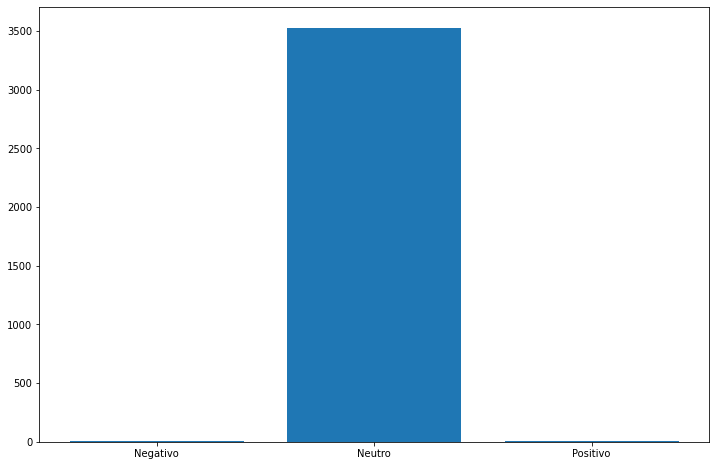

In [ ]:
labels = df.groupby('Score').count().index.values

values = df.groupby('Score').size().values

plt.bar(labels, values)

Podemos ver como os tweets negativos, neutros e positivos se espalham nessa conta.

Também podemos visualizar as mesmas informações exibindo os valores exatos de subjetividade e polacidade no gráfico.

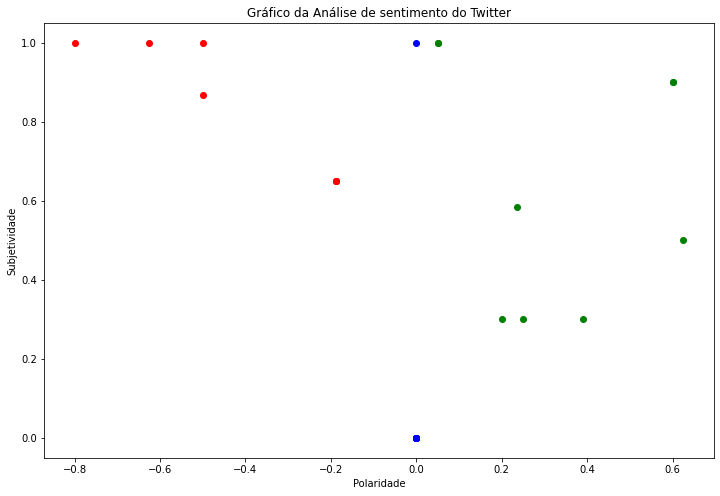

In [ ]:
for index, row in df.iterrows():
    if row['Score'] == 'Positivo':
        plt.scatter(row['Polarity'], row['Subjectivity'], color="green")
    elif row['Score'] == 'Negativo':
        plt.scatter(row['Polarity'], row['Subjectivity'], color="red")
    elif row['Score'] == 'Neutro':
        plt.scatter(row['Polarity'], row['Subjectivity'], color="blue")

plt.title('Gráfico da Análise de sentimento do Twitter')
plt.xlabel('Polaridade')
plt.ylabel('Subjetividade')
# add legend
plt.show()

Também podemos calcular a porcentagem de tweets objetivos.

In [ ]:
objective = df[df['Subjectivity'] == 0]

print(str(objective.shape[0]/(df.shape[0])*100) + " % de tweets objetivos")

99.5201806378775 % de tweets objetivos


Enfim, também podemos gerar uma nuvem de wrod para ver os temas e palavras mais comuns usados ​​nos tweets que analisamos.

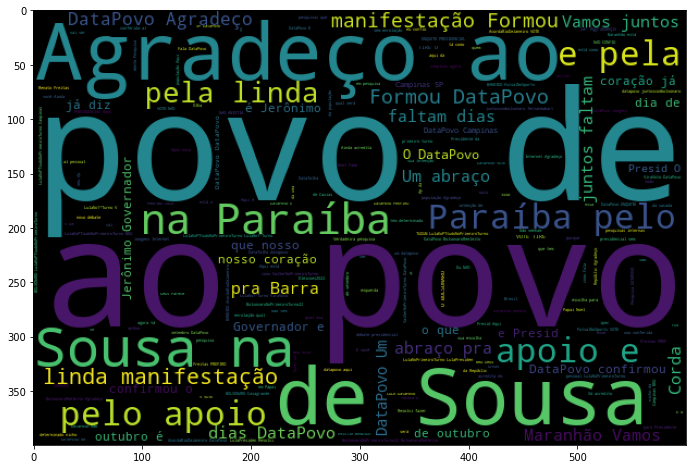

In [ ]:
# Creating a word cloud
words = ' '.join([tweet for tweet in df['TextOriginal']])
wordCloud = WordCloud(width=600, height=400).generate(words)

plt.imshow(wordCloud)
plt.show()


In [ ]:
#import nltk
#nltk.download('punkt')
#df['tokenized_text'] = df.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)

#nltk.download("stopwords")
#stopwords = nltk.corpus.stopwords.words('portuguese')

text = df['TextOriginal']
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords=stopwords).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Fazer uma análise de sentimento dos tweets nos permitiu calcular valores numéricos de subjetividade e polaridade.

Isso pode nos ajudar a entender melhor esta conta do Tweeter em termos da linguagem que está sendo usada.

Combinar isso com informações adicionais sobre curtidas e comentários pode ser muito útil do ponto de vista de marketing e pode nos permitir encontrar alguma correlação entre subjetividade, polaridade e engajamento dos usuários para uma conta específica do Tweeter.
